In [4]:
#!pip install seaborn

In [2]:
#import pip
pip.main(['install','seaborn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (0.13.1)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from seaborn) (1.25.0)

Requirement already satisfied: pandas>=1.2 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from seaborn) (2.0.2)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from seaborn) (3.7.1)

Requirement already satisfied: contourpy>=1.0.1 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.1.0)

Requirement already satisfied: cycler>=0.10 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.40.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.4)

Requirement already satisfied: packaging>=20.0 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (23.2)

Requirement already satisfied: pillow>=6.2.0 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.2.0)

Requirement already satisfied: pyparsing>=2.3.1 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.0)

Requirement already satisfied: python-dateutil>=2.7 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from pandas>=1.2->seaborn) (2023.3)

Requirement already satisfied: tzdata>=2022.1 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from pandas>=1.2->seaborn) (2023.3)

Requirement already satisfied: six>=1.5 in /anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

0

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [15]:
df = pd.read_csv('/home/azureuser/cloudfiles/code/DeepLearning/Score.csv')
test = pd.read_csv('/home/azureuser/cloudfiles/code/DeepLearning/Score.csv')

In [16]:
df=pd.concat([df,test], axis=0).reset_index(drop=True)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


In [17]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199920 entries, 0 to 199919
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Delay_from_due_date       199920 non-null  float64
 1   Num_of_Delayed_Payment    199920 non-null  float64
 2   Num_Credit_Inquiries      199920 non-null  float64
 3   Credit_Utilization_Ratio  199920 non-null  float64
 4   Credit_History_Age        199920 non-null  float64
 5   Payment_of_Min_Amount     199920 non-null  object 
 6   Amount_invested_monthly   199920 non-null  float64
 7   Monthly_Balance           199920 non-null  float64
 8   Credit_Score              199920 non-null  object 
 9   Credit_Mix                199920 non-null  object 
 10  Payment_Behaviour         199920 non-null  object 
 11  Age                       199920 non-null  float64
 12  Annual_Income             199920 non-null  float64
 13  Num_Bank_Accounts         199920 non-null  f

In [19]:
df.shape

(199920, 21)

In [20]:
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

In [21]:
df.duplicated().sum()

99960

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,199920.000,21.096,14.827,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,199920.000,13.336,6.270,0.000,9.000,14.000,18.000,28.000
Num_Credit_Inquiries,199920.000,5.775,3.862,0.000,3.000,5.000,8.000,29.000
Credit_Utilization_Ratio,199920.000,32.285,5.117,20.000,28.052,32.305,36.496,50.000
Credit_History_Age,199920.000,221.123,99.696,1.000,144.000,219.000,302.000,404.000
Amount_invested_monthly,199920.000,193.665,194.782,0.000,73.709,129.342,234.324,1977.326
Monthly_Balance,199920.000,403.445,214.387,0.008,270.317,337.238,471.905,1602.041
Age,199920.000,33.269,10.762,14.000,24.000,33.000,42.000,56.000
Annual_Income,199920.000,50498.704,38294.147,7005.930,19338.480,36996.830,71681.400,179987.280
Num_Bank_Accounts,199920.000,5.369,2.592,0.000,3.000,5.000,7.000,10.000


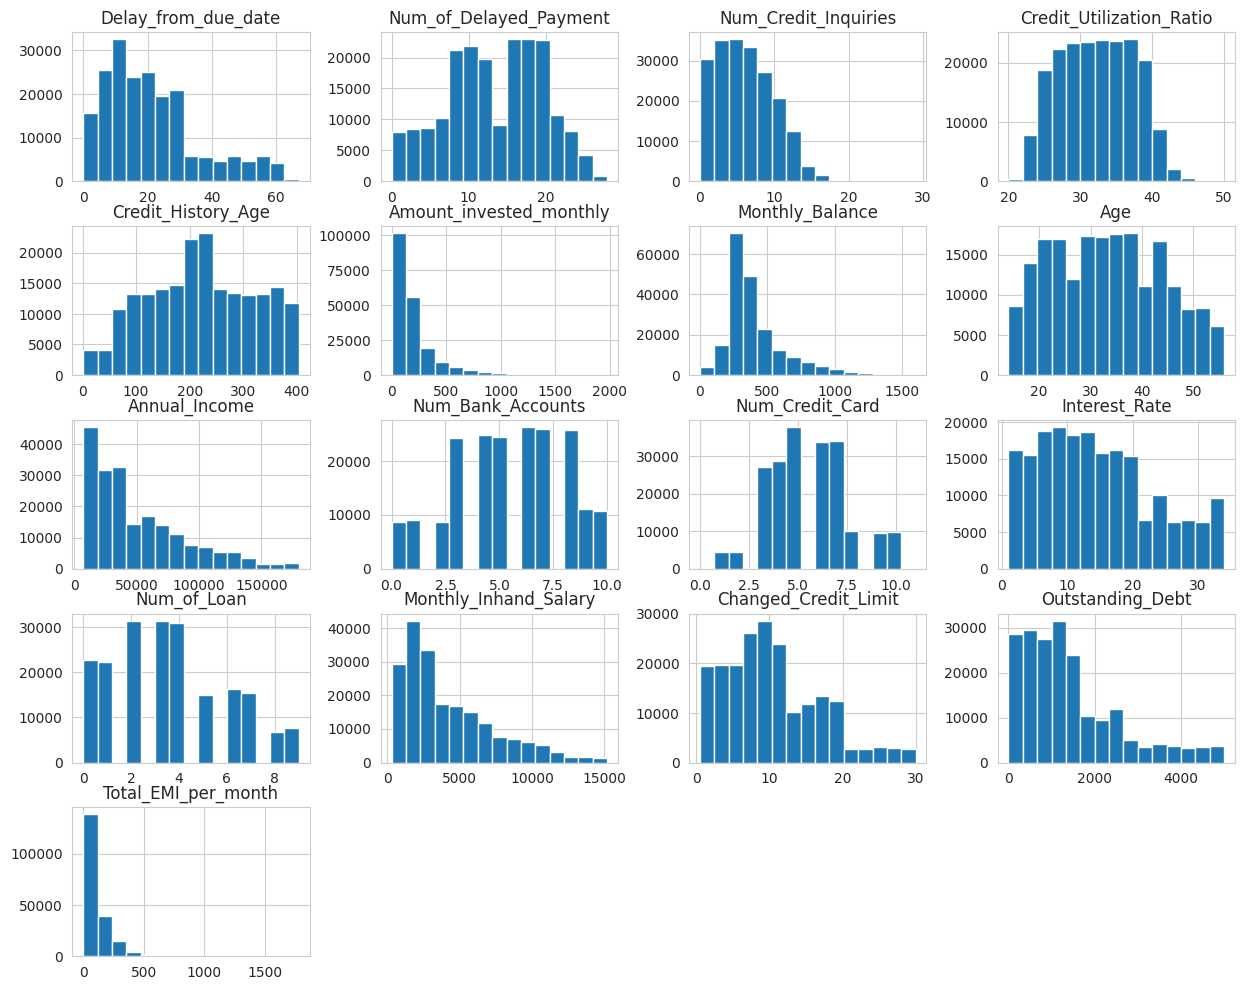

In [23]:
df.hist(figsize=(15, 12), bins=15);

Bu kod blogu, bir pandas DataFrame'inin kategorik (object) özelliklerini analiz etmek için kullanılır. Kod, her bir kategorik özelliğin benzersiz (unique) değer sayısını ```nunique())``` hesaplar ve ekrana yazdırır. Ayrıca, ```f-string``` (format string) kullanılarak özellik adı ve benzersiz değer sayısı düzenli bir şekilde gösterilir.

In [24]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

Payment_of_Min_Amount: 3
Credit_Score        : 3
Credit_Mix          : 3
Payment_Behaviour   : 6


In [25]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [26]:
df.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [27]:
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

In [28]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include='number').columns

In [29]:

def get_unique_values_and_counts(column_name):
    """ This function takes the column name and returns
    unique values and the counts """
    # Get the unique values in the specified column
    unique_values = df[column_name].unique()

    # Count the occurrences of each unique value
    value_counts = df[column_name].value_counts()

    print(f"<-------{column_name}-------->")
    print("Unique values :\n", unique_values)
    print("<----------------------------->")
    print("Value Counts : \n", value_counts)

In [30]:
for i in categorical_features:
    get_unique_values_and_counts(i)

<-------Payment_of_Min_Amount-------->
Unique values :
 ['No' 'NM' 'Yes']
<----------------------------->
Value Counts : 
 Payment_of_Min_Amount
Yes    104652
No      71256
NM      24012
Name: count, dtype: int64
<-------Credit_Score-------->
Unique values :
 ['Good' 'Standard' 'Poor']
<----------------------------->
Value Counts : 
 Credit_Score
Standard    106298
Poor         57976
Good         35646
Name: count, dtype: int64
<-------Credit_Mix-------->
Unique values :
 ['Good' 'Standard' 'Bad']
<----------------------------->
Value Counts : 
 Credit_Mix
Standard    91664
Good        60720
Bad         47536
Name: count, dtype: int64
<-------Payment_Behaviour-------->
Unique values :
 ['High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Small_value_payments' 'Low_spent_Medium_value_payments']
<----------------------------->
Value Counts : 
 Payment_Behaviour
Low_spent_Small_value_payments 

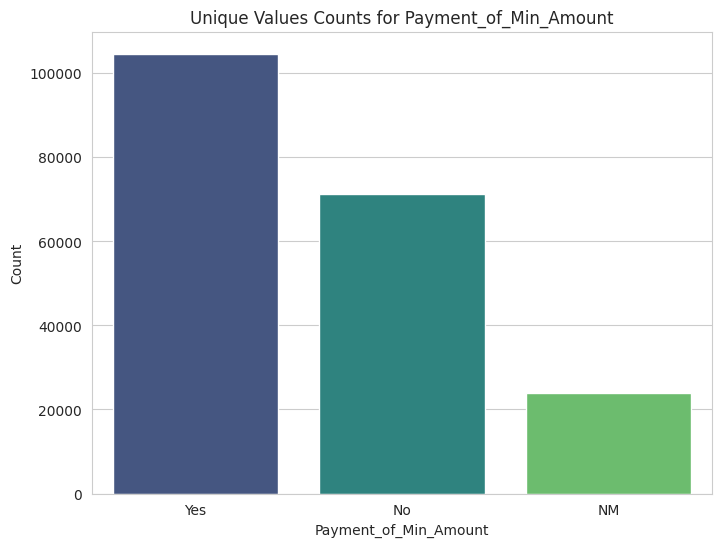

In [31]:
col_name = 'Payment_of_Min_Amount'
value_counts = df['Payment_of_Min_Amount'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Grafik başlığı ve eksen etiketleri
plt.title(f'Unique Values Counts for {col_name}')
plt.xlabel(col_name)
plt.ylabel('Count')

plt.show()


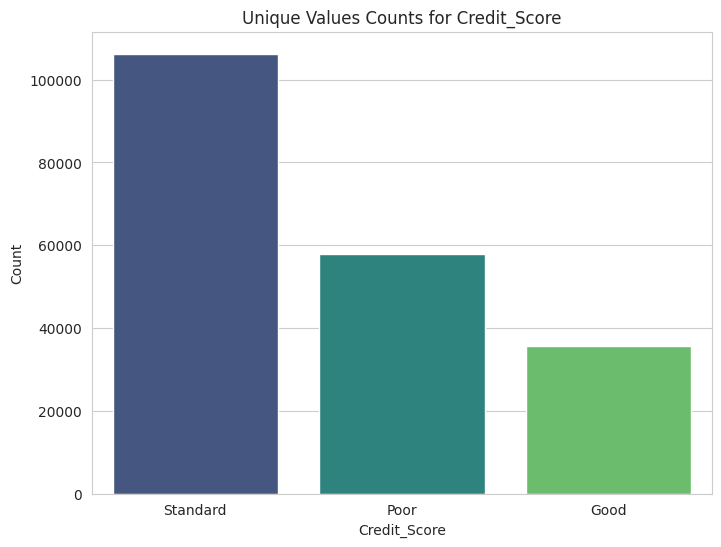

In [32]:
col_name = 'Credit_Score'
value_counts = df['Credit_Score'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Grafik başlığı ve eksen etiketleri
plt.title(f'Unique Values Counts for {col_name}')
plt.xlabel(col_name)
plt.ylabel('Count')

plt.show()


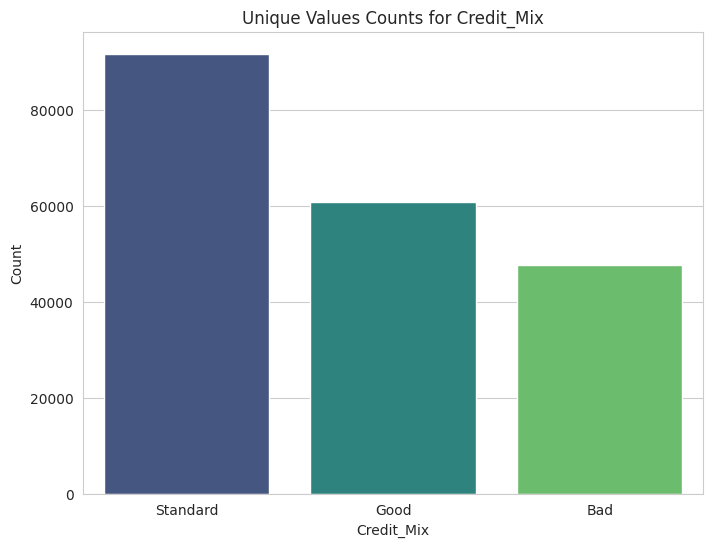

In [33]:
col_name = 'Credit_Mix'
value_counts = df['Credit_Mix'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Grafik başlığı ve eksen etiketleri
plt.title(f'Unique Values Counts for {col_name}')
plt.xlabel(col_name)
plt.ylabel('Count')

plt.show()


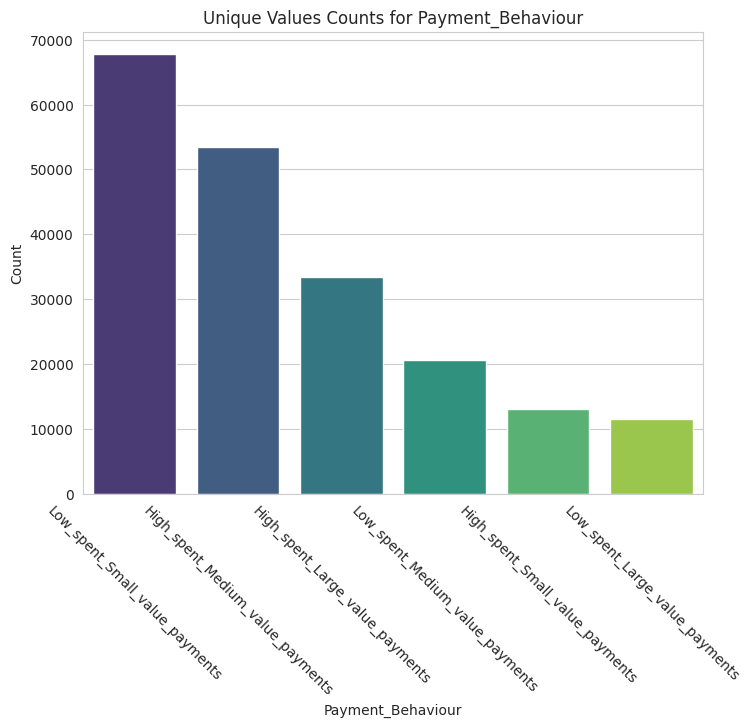

In [34]:
col_name = 'Payment_Behaviour'
value_counts = df['Payment_Behaviour'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.xticks(rotation=-45)
plt.title(f'Unique Values Counts for {col_name}')
plt.xlabel(col_name)
plt.ylabel('Count')

plt.show()


In [35]:
len(df["Credit_Utilization_Ratio"].unique())

99960

In [36]:
df["Payment_Behaviour"].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [37]:
df2=df.copy()
df2["Utilization_Ratio_Bin"]=["(0-10)" if i<=10 else "10-20"
                               if (i>10 and i<=20) else "20-30"
                               if (i>20 and i<=30) else "30-40"
                               if (i>30 and i<=40) else "40-50"
                               if (i>40 and i<=50) else "50-60" for i in df2["Credit_Utilization_Ratio"]]
df2.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Utilization_Ratio_Bin
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,20-30
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,30-40
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,20-30
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,30-40
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575,20-30


In [38]:
u_rat_list = list(df2["Utilization_Ratio_Bin"].unique())
p_beh_list = list(df2["Payment_Behaviour"].unique())
High_spent_Small = []
Low_spent_Large = []
Low_spent_Medium = []
Low_spent_Small = []
High_spent_Medium = []
High_spent_Large = []

for i in p_beh_list:
    for j in u_rat_list:
        x = df2[df2["Utilization_Ratio_Bin"] == j]
        if i == "High_spent_Small_value_payments":
            High_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Large_value_payments":
            Low_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Medium_value_payments":
            Low_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Small_value_payments":
            Low_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Medium_value_payments":
            High_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Large_value_payments":
            High_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)

In [39]:
dic={"High_spent_Small_value_payments":High_spent_Small,
    "Low_spent_Large_value_payments":Low_spent_Large,
    "Low_spent_Medium_value_payments":Low_spent_Medium,
    "Low_spent_Small_value_payments":Low_spent_Small,
    "High_spent_Medium_value_payments":High_spent_Medium,
    "High_spent_Large_value_payments":High_spent_Large}

df3=pd.DataFrame(dic)
df3["Utilization_Ratio_Bin"]=list(df2["Utilization_Ratio_Bin"].unique())
df3

,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments,Utilization_Ratio_Bin
0,6.464,6.002,10.313,37.210,26.097,13.914,20-30
1,6.648,5.733,10.212,33.419,26.884,17.105,30-40
2,5.497,4.540,11.254,18.247,29.327,31.136,40-50
3,0.000,0.000,0.000,0.000,100.000,0.000,50-60
4,0.000,0.000,0.000,100.000,0.000,0.000,10-20


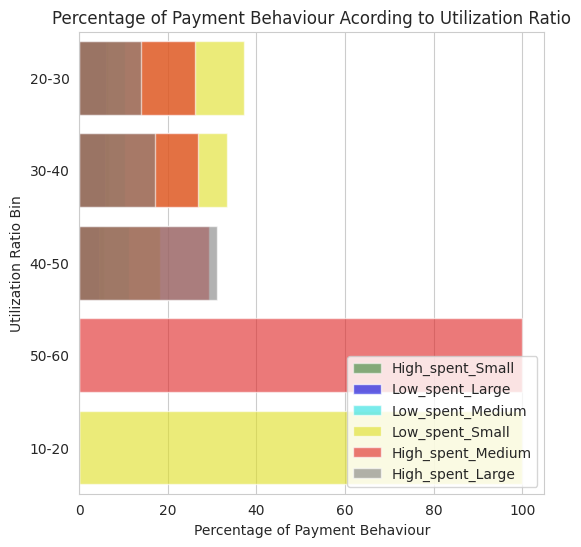

In [40]:
f,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=High_spent_Small,y=u_rat_list,color="green",alpha=0.5,label="High_spent_Small")
sns.barplot(x=Low_spent_Large,y=u_rat_list,color="blue",alpha=0.7,label="Low_spent_Large")
sns.barplot(x=Low_spent_Medium,y=u_rat_list,color="cyan",alpha=0.6,label="Low_spent_Medium")
sns.barplot(x=Low_spent_Small,y=u_rat_list,color="yellow",alpha=0.6,label="Low_spent_Small")
sns.barplot(x=High_spent_Medium,y=u_rat_list,color="red",alpha=0.6,label="High_spent_Medium")
sns.barplot(x=High_spent_Large,y=u_rat_list,color="gray",alpha=0.6,label="High_spent_Large")

ax.legend(loc="lower right",frameon=True)
ax.set(xlabel="Percentage of Payment Behaviour",ylabel="Utilization Ratio Bin",title="Percentage of Payment Behaviour Acording to Utilization Ratio")
plt.show()

In [41]:
df1 = df.copy()

<Axes: >

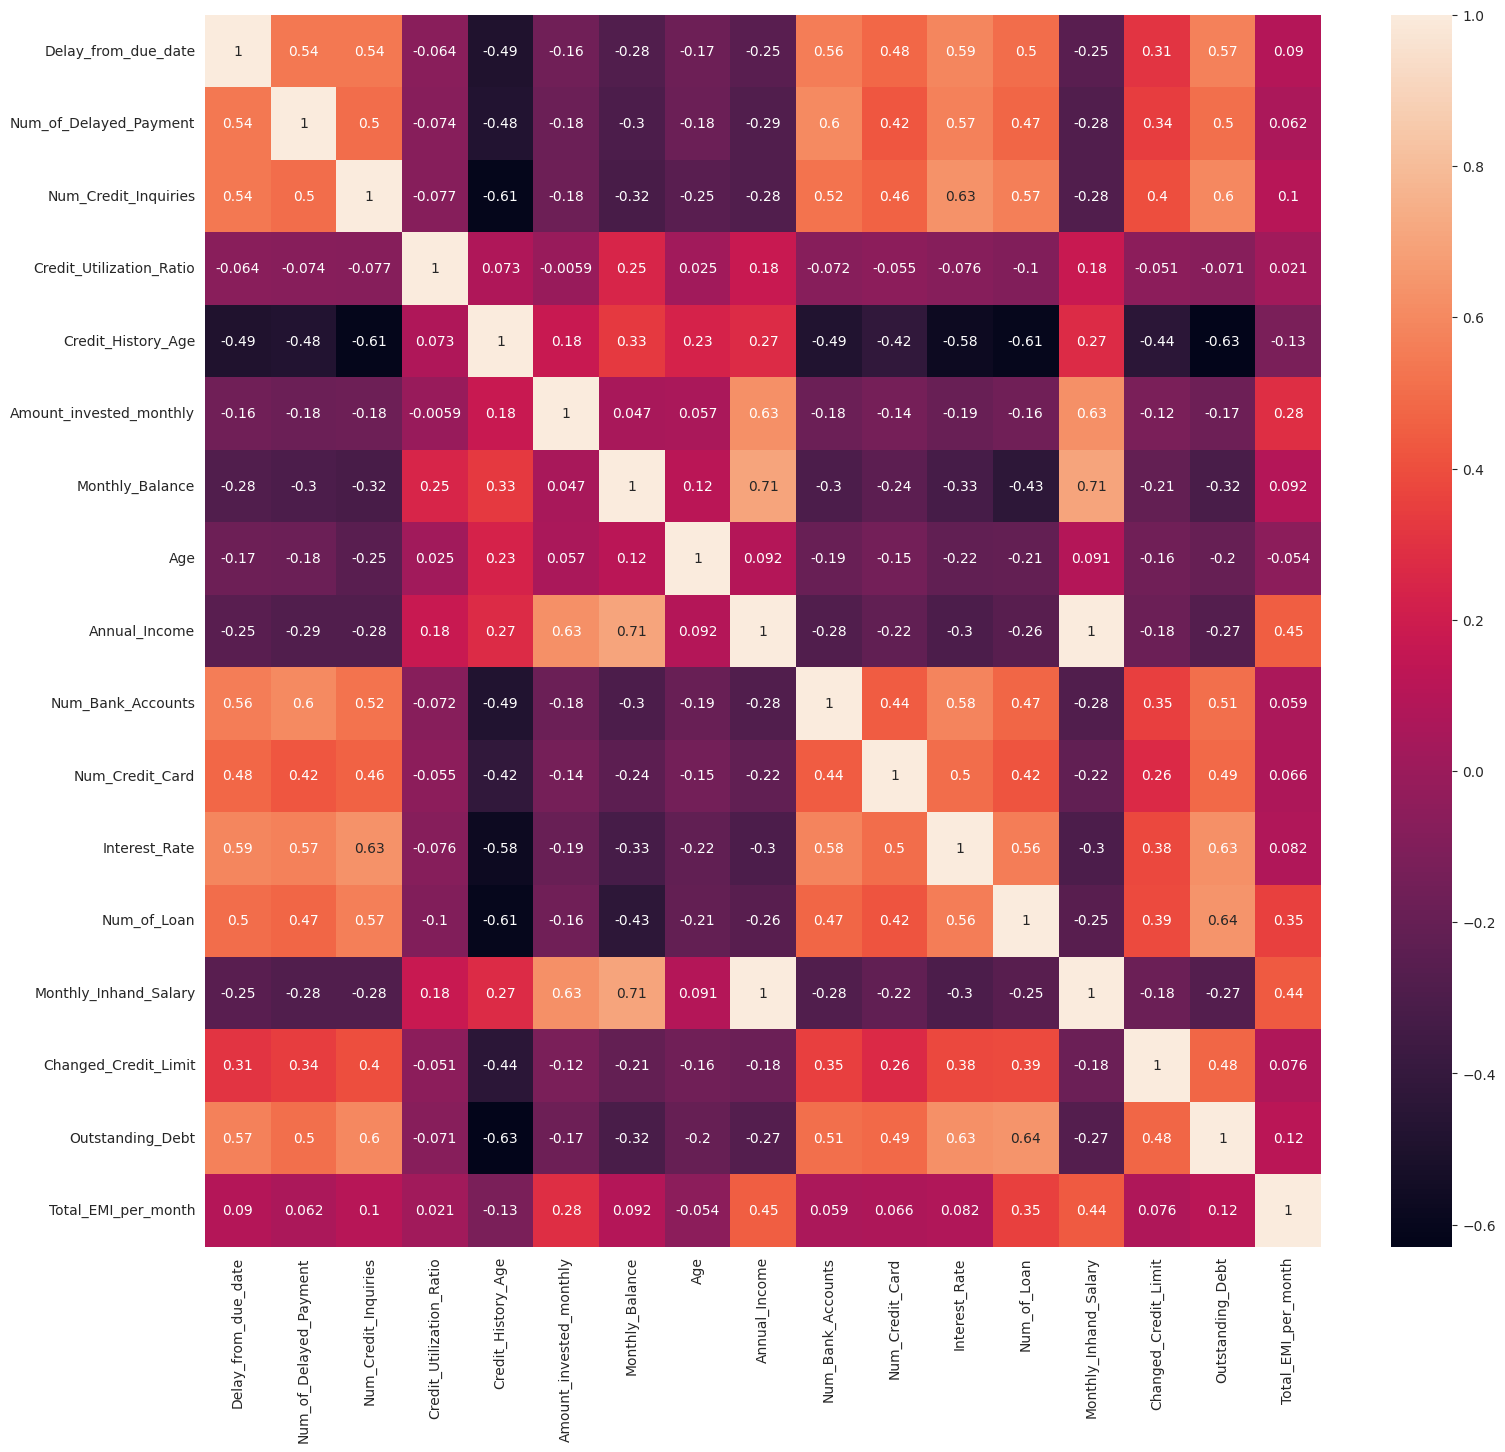

In [42]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

<Axes: >

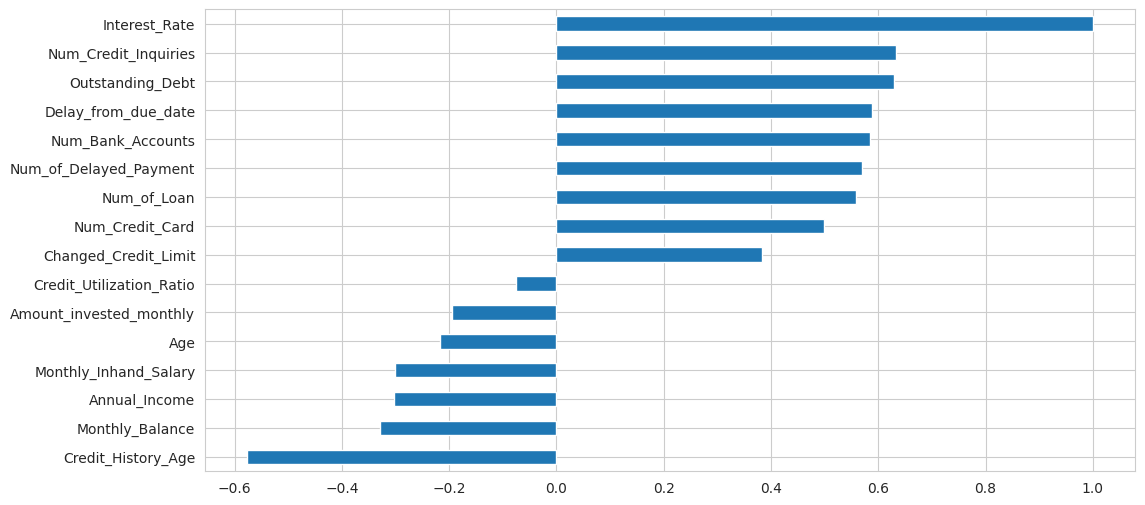

In [43]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].corr()['Interest_Rate'][:-1].sort_values().plot.barh()


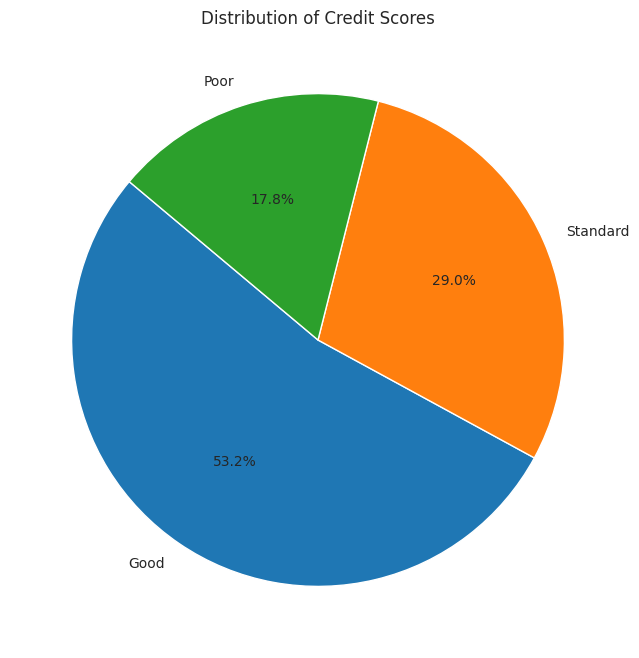

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(df['Credit_Score'].value_counts(), labels=df['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()

**``The target variable is not balanced``**

In [45]:
#pip install category_encoders

**Fearure Selection**

In [46]:
#pip install imbalanced-learn

In [47]:
df["Credit_Score"]

0             Good
1             Good
2             Good
3             Good
4             Good
            ...   
199915        Poor
199916        Poor
199917        Poor
199918    Standard
199919        Poor
Name: Credit_Score, Length: 199920, dtype: object

In [48]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.000,7.000,4.000,26.823,265.000,No,80.415,312.494,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
1,3.000,7.000,4.000,31.945,265.000,No,118.280,284.629,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
2,3.000,7.000,4.000,28.609,267.000,No,81.700,331.210,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
3,5.000,4.000,4.000,31.378,268.000,No,199.458,223.451,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575
4,6.000,4.000,4.000,24.797,269.000,No,41.420,341.489,Good,Good,...,23.000,19114.120,3.000,4.000,3.000,4.000,1824.843,11.270,809.980,49.575


In [49]:
categorical_features

Index(['Payment_of_Min_Amount', 'Credit_Score', 'Credit_Mix',
       'Payment_Behaviour'],
      dtype='object')

In [50]:
df["Payment_of_Min_Amount"]

0         No
1         No
2         No
3         No
4         No
          ..
199915    No
199916    No
199917    No
199918    No
199919    No
Name: Payment_of_Min_Amount, Length: 199920, dtype: object

### **``Prepare the data for SMOTE``**

In [51]:
df = df2.copy()

### **``Apply Label Encoder to the Target``**

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X = df.drop('Credit_Score', axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['Credit_Score']

# Label Encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert to categorical
y_categorical = to_categorical(y)

## **``Apply SMOTE``**

In [53]:
smote = SMOTE(k_neighbors=10)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [54]:
X_resampled

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Utilization_Ratio_Bin_20-30,Utilization_Ratio_Bin_30-40,Utilization_Ratio_Bin_40-50,Utilization_Ratio_Bin_50-60
0,3.000,7.000,4.000,26.823,265.000,80.415,312.494,23.000,19114.120,3.000,...,False,True,False,False,False,False,True,False,False,False
1,3.000,7.000,4.000,31.945,265.000,118.280,284.629,23.000,19114.120,3.000,...,False,True,False,False,False,False,False,True,False,False
2,3.000,7.000,4.000,28.609,267.000,81.700,331.210,23.000,19114.120,3.000,...,False,True,False,False,False,False,True,False,False,False
3,5.000,4.000,4.000,31.378,268.000,199.458,223.451,23.000,19114.120,3.000,...,False,True,False,False,False,False,False,True,False,False
4,6.000,4.000,4.000,24.797,269.000,41.420,341.489,23.000,19114.120,3.000,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318889,9.000,10.000,14.000,26.213,197.000,109.612,550.223,28.000,61131.360,3.000,...,True,True,False,False,False,False,True,False,False,False
318890,35.748,24.000,9.000,35.171,176.832,95.961,349.132,15.000,20616.960,9.000,...,False,True,False,False,False,False,False,True,False,False
318891,25.713,14.842,2.426,40.029,272.028,124.920,1149.619,27.268,146870.802,3.139,...,True,False,False,False,False,False,True,False,True,False
318892,58.378,13.604,8.345,38.330,119.259,66.765,284.925,24.431,15871.369,6.259,...,True,False,False,False,False,True,False,True,False,False


### **``Split the data``**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

minority_classes = [0, 1, 2]  # Sınıf etiketlerini belirleme

In [56]:
df.drop(categorical_features, axis=1, inplace = True)

In [57]:
y

array([0, 0, 0, ..., 1, 2, 1])

In [58]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Utilization_Ratio_Bin_20-30,Utilization_Ratio_Bin_30-40,Utilization_Ratio_Bin_40-50,Utilization_Ratio_Bin_50-60
0,3.000,7.000,4.000,26.823,265.000,80.415,312.494,23.000,19114.120,3.000,...,3.000,4.000,1824.843,11.270,809.980,49.575,True,False,False,False
1,3.000,7.000,4.000,31.945,265.000,118.280,284.629,23.000,19114.120,3.000,...,3.000,4.000,1824.843,11.270,809.980,49.575,False,True,False,False
2,3.000,7.000,4.000,28.609,267.000,81.700,331.210,23.000,19114.120,3.000,...,3.000,4.000,1824.843,11.270,809.980,49.575,True,False,False,False
3,5.000,4.000,4.000,31.378,268.000,199.458,223.451,23.000,19114.120,3.000,...,3.000,4.000,1824.843,11.270,809.980,49.575,False,True,False,False
4,6.000,4.000,4.000,24.797,269.000,41.420,341.489,23.000,19114.120,3.000,...,3.000,4.000,1824.843,11.270,809.980,49.575,True,False,False,False


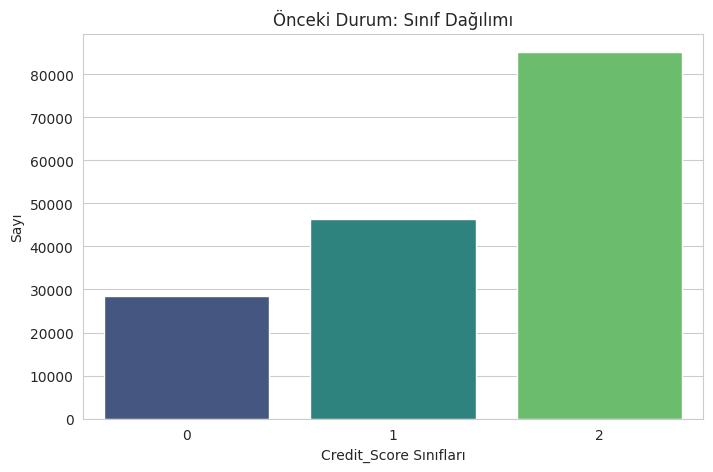

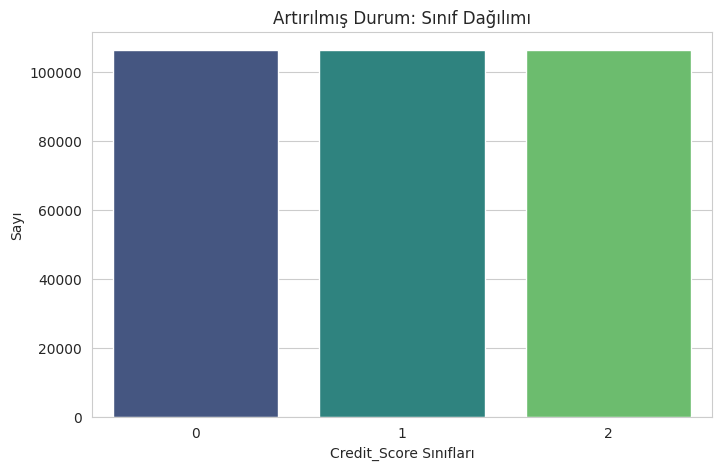

In [59]:
# Önceki durumun sınıf dağılımı
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Önceki Durum: Sınıf Dağılımı')
plt.xlabel('Credit_Score Sınıfları')
plt.ylabel('Sayı')
plt.show()

# Artırılmış durumun sınıf dağılımı
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Artırılmış Durum: Sınıf Dağılımı')
plt.xlabel('Credit_Score Sınıfları')
plt.ylabel('Sayı')
plt.show()

=============**Reshape the training data**================

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [61]:
y_resampled = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [62]:
X_train.shape

(159936, 30)

In [63]:
y_resampled.shape

(159936, 3)

In [64]:
scaler = MinMaxScaler()

### **===============``X_resembled turns to X_train here``===============**

In [65]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [67]:
from tensorflow.keras.optimizers import Adam

In [68]:
#!pip install scikeras


In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam

seed = 42
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
#model.add(Dense(128, activation="relu"))
#model.add(BatchNormalization())
model.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.0003)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["Accuracy"])

In [70]:
early_stop = EarlyStopping(monitor="val_Accuracy",
                           mode="auto",
                           verbose=1,
                           patience=70)

In [71]:
history = model.fit(x=X_train,
              y=y_resampled,
              validation_split=.1,
              batch_size=32,
              epochs=200,
              verbose=1,
              callbacks=[early_stop])

Epoch 1/200
4499/4499 [==============================] - 10s 2ms/step - loss: 0.7185 - Accuracy: 0.6764 - val_loss: 0.6891 - val_Accuracy: 0.6956
Epoch 2/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.6875 - Accuracy: 0.6964 - val_loss: 0.6782 - val_Accuracy: 0.7005
Epoch 3/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.6780 - Accuracy: 0.7025 - val_loss: 0.6749 - val_Accuracy: 0.7024
Epoch 4/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.6724 - Accuracy: 0.7056 - val_loss: 0.6703 - val_Accuracy: 0.7051
Epoch 5/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.6667 - Accuracy: 0.7089 - val_loss: 0.6656 - val_Accuracy: 0.7063
Epoch 6/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.6617 - Accuracy: 0.7113 - val_loss: 0.6667 - val_Accuracy: 0.7080
Epoch 7/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.6576 - Accuracy: 0.7127 - val_loss: 0.6577 - val_A

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

!python3 -m pip install tensorflow[and-cuda]
 Verify the installation:
!python3 -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [73]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.718,0.676,0.689,0.696
1,0.687,0.696,0.678,0.701
2,0.678,0.703,0.675,0.702
3,0.672,0.706,0.670,0.705
4,0.667,0.709,0.666,0.706


In [74]:
model.evaluate(X_test, y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.5016 - Accuracy: 0.7928


[0.5016223192214966, 0.7928421497344971]

<Axes: >

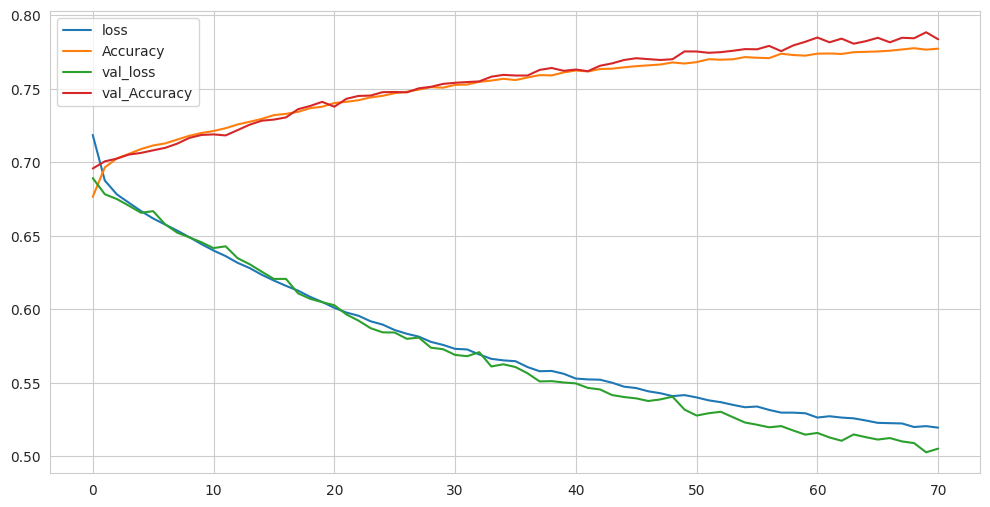

In [75]:
loss_df.plot()

In [76]:
from sklearn.metrics import confusion_matrix

# Assuming y_resampled and predictions are NumPy arrays
# Assuming you have predictions from your model
predictions = model.predict(X_test)  # Replace X_test with your test data

# Trim or sample y_resampled to match the length of predictions
y_resampled_trimmed = y_resampled[:len(predictions)]

cm = confusion_matrix(
    y_resampled_trimmed.argmax(axis=1), predictions.argmax(axis=1)
)
report = classification_report(
    y_resampled_trimmed.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=["Class 0", "Class 1", "Class 2"]  # Replace with your class names
)

print(cm)
print(report)

1250/1250 [==============================] - 1s 760us/step
[[ 1291  2160  3597]
 [ 2098  3588  6023]
 [ 3803  6498 10926]]
              precision    recall  f1-score   support

     Class 0       0.18      0.18      0.18      7048
     Class 1       0.29      0.31      0.30     11709
     Class 2       0.53      0.51      0.52     21227

    accuracy                           0.40     39984
   macro avg       0.33      0.33      0.33     39984
weighted avg       0.40      0.40      0.40     39984



### **``Save the model and load the weights for another model traoining``**

In [77]:
# Assuming model is your Keras model
model.save('model_weights_.h5')

In [78]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model_weights_.h5')


In [86]:
weights = loaded_model.get_weights()

In [88]:
tf.random.set_seed(seed)

model2 = Sequential()

model2.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.1))
#model.add(Dense(128, activation="relu"))
#model.add(BatchNormalization())
model2.add(Dense(3, activation="softmax"))
model2.set_weights(weights)

opt = Adam(learning_rate=0.0003)
model2.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["Accuracy"])

In [89]:
early_stop = EarlyStopping(monitor="val_Accuracy",
                           mode="auto",
                           verbose=1,
                           patience=150)

In [90]:
history = model2.fit(x=X_train,
              y=y_resampled,
              validation_split=.1,
              batch_size=32,
              epochs=200,
              verbose=1,
              callbacks=[early_stop])

Epoch 1/200
4499/4499 [==============================] - 9s 2ms/step - loss: 0.5180 - Accuracy: 0.7771 - val_loss: 0.5081 - val_Accuracy: 0.7855
Epoch 2/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.5182 - Accuracy: 0.7782 - val_loss: 0.5016 - val_Accuracy: 0.7877
Epoch 3/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.5156 - Accuracy: 0.7791 - val_loss: 0.5056 - val_Accuracy: 0.7853
Epoch 4/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.5167 - Accuracy: 0.7785 - val_loss: 0.5071 - val_Accuracy: 0.7847
Epoch 5/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.5145 - Accuracy: 0.7788 - val_loss: 0.5016 - val_Accuracy: 0.7879
Epoch 6/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.5140 - Accuracy: 0.7800 - val_loss: 0.4992 - val_Accuracy: 0.7876
Epoch 7/200
4499/4499 [==============================] - 8s 2ms/step - loss: 0.5128 - Accuracy: 0.7800 - val_loss: 0.4983 - val_Ac

**This step is to fix the y_resampled data as we made some changes to build a confusion matrix.**

In [91]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               3968      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_33 (Dense)            (None, 3)                

In [92]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.518,0.777,0.508,0.785
1,0.518,0.778,0.502,0.788
2,0.516,0.779,0.506,0.785
3,0.517,0.778,0.507,0.785
4,0.514,0.779,0.502,0.788


In [93]:
loss_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
loss,154.000,0.485,0.014,0.466,0.473,0.482,0.494,0.518
Accuracy,154.000,0.793,0.006,0.777,0.789,0.795,0.799,0.802
val_loss,154.000,0.467,0.016,0.443,0.453,0.462,0.478,0.508
val_Accuracy,154.000,0.805,0.008,0.785,0.799,0.807,0.811,0.816


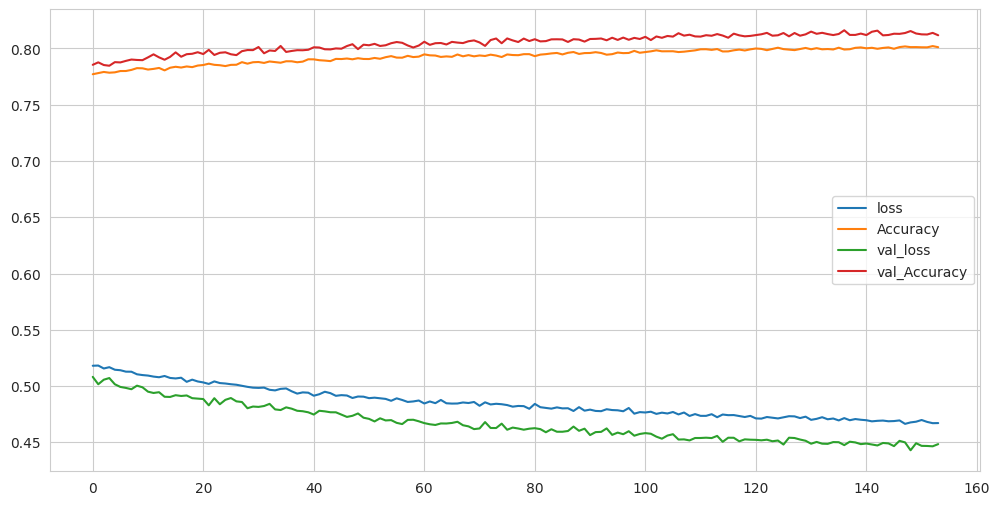

In [94]:
loss_df2.plot();

In [95]:
model2.evaluate(X_test, y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.4398 - Accuracy: 0.8193


[0.43976321816444397, 0.819327712059021]

[0.3726901113986969, 0.8478891849517822] / previous scores were like

The difference is very slight but we have some progress indeed. better to try one more time..

In [97]:
# Assuming model is your Keras model
model2.save('model2_weights.h5')

In [98]:
from tensorflow.keras.models import load_model
# Assuming model is your Keras model
model2.save('model2_weights.h5')
loaded_model2 = load_model('model2_weights.h5')


In [101]:
weights2 = loaded_model2.get_weights()

In [106]:
from keras.regularizers import l2, l1
tf.random.set_seed(seed)

model3 = Sequential()

model3.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.1))
#model.add(Dense(128, activation="relu"))
#model.add(BatchNormalization())
model3.add(Dense(3, activation="softmax"))
model3.set_weights(weights2)

opt = Adam(learning_rate=0.000006)
model3.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["Accuracy"])

In [107]:
early_stop = EarlyStopping(monitor="val_Accuracy",
                           mode="max",
                           verbose=1,
                           patience=150)

In [108]:
history = model3.fit(x=X_train,
              y=y_resampled,
              validation_split=.1,
              batch_size=64,
              epochs=200,
              verbose=1,
              callbacks=[early_stop])

Epoch 1/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.4579 - Accuracy: 0.8055 - val_loss: 0.4433 - val_Accuracy: 0.8139
Epoch 2/200
2250/2250 [==============================] - 4s 2ms/step - loss: 0.4529 - Accuracy: 0.8080 - val_loss: 0.4409 - val_Accuracy: 0.8153
Epoch 3/200
2250/2250 [==============================] - 4s 2ms/step - loss: 0.4531 - Accuracy: 0.8062 - val_loss: 0.4396 - val_Accuracy: 0.8151
Epoch 4/200
2250/2250 [==============================] - 4s 2ms/step - loss: 0.4524 - Accuracy: 0.8083 - val_loss: 0.4388 - val_Accuracy: 0.8157
Epoch 5/200
2250/2250 [==============================] - 4s 2ms/step - loss: 0.4514 - Accuracy: 0.8088 - val_loss: 0.4383 - val_Accuracy: 0.8159
Epoch 6/200
2250/2250 [==============================] - 4s 2ms/step - loss: 0.4507 - Accuracy: 0.8082 - val_loss: 0.4378 - val_Accuracy: 0.8165
Epoch 7/200
2250/2250 [==============================] - 4s 2ms/step - loss: 0.4507 - Accuracy: 0.8085 - val_loss: 0.4373 - val_Ac

In [109]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               3968      
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               16512     
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 3)               

In [110]:
loss_df3 = pd.DataFrame(model3.history.history)
loss_df3.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.458,0.805,0.443,0.814
1,0.453,0.808,0.441,0.815
2,0.453,0.806,0.440,0.815
3,0.452,0.808,0.439,0.816
4,0.451,0.809,0.438,0.816


In [111]:
loss_df3.describe().T

,count,mean,std,min,25%,50%,75%,max
loss,200.000,0.444,0.003,0.437,0.442,0.443,0.445,0.458
Accuracy,200.000,0.811,0.001,0.805,0.811,0.811,0.812,0.814
val_loss,200.000,0.431,0.003,0.428,0.429,0.430,0.432,0.443
val_Accuracy,200.000,0.820,0.001,0.814,0.819,0.820,0.820,0.821


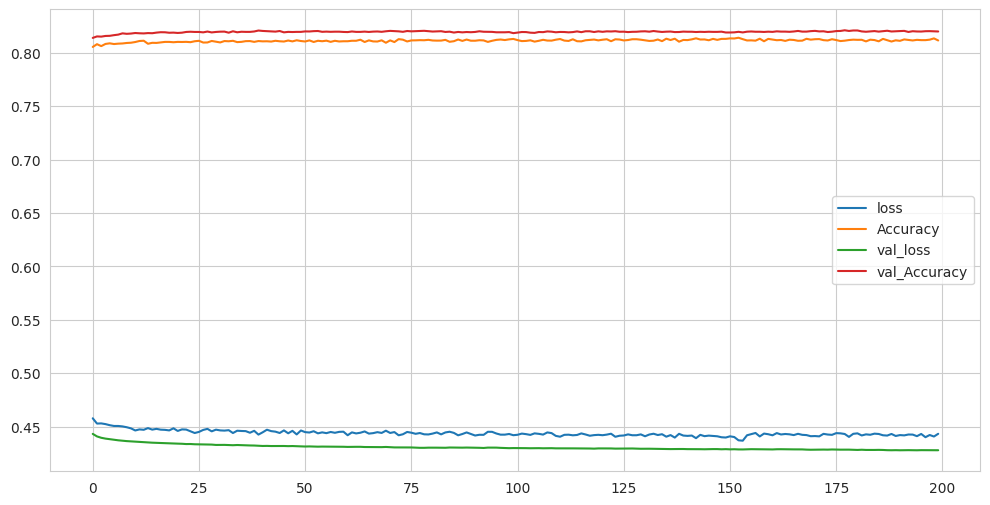

In [112]:
loss_df3.plot();

In [113]:
model3.evaluate(X_test, y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.4213 - Accuracy: 0.8274


[0.4212879538536072, 0.8273559212684631]

In [115]:
tf.random.set_seed(seed)

model4 = Sequential()

model4.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Dense(512, activation="relu"))
model4.add(Dropout(0.1))
#model4.add(Dense(64, activation="relu"))
model4.add(Dropout(0.1))

model4.add(Dense(3, activation="softmax"))

opt = Adam(learning_rate=0.0003)
model4.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["Accuracy"])

In [116]:
early_stop = EarlyStopping(monitor="val_Accuracy",
                           mode="max",
                           verbose=1,
                           patience=150)

In [117]:
history = model4.fit(x=X_train,
              y=y_resampled,
              validation_split=.1,
              batch_size=64,
              epochs=200,
              verbose=1,
              callbacks=[early_stop])

Epoch 1/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.7233 - Accuracy: 0.6793 - val_loss: 0.6903 - val_Accuracy: 0.6903
Epoch 2/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6841 - Accuracy: 0.7004 - val_loss: 0.6748 - val_Accuracy: 0.6995
Epoch 3/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6708 - Accuracy: 0.7063 - val_loss: 0.6685 - val_Accuracy: 0.7047
Epoch 4/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6607 - Accuracy: 0.7121 - val_loss: 0.6585 - val_Accuracy: 0.7046
Epoch 5/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6493 - Accuracy: 0.7172 - val_loss: 0.6475 - val_Accuracy: 0.7139
Epoch 6/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6366 - Accuracy: 0.7228 - val_loss: 0.6388 - val_Accuracy: 0.7206
Epoch 7/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.6232 - Accuracy: 0.7299 - val_loss: 0.6251 - val_Ac

In [118]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 512)               15872     
                                                                 
 batch_normalization_16 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_38 (Dropout)        (None, 512)               0         
                                                                 
 dense_55 (Dense)            (None, 512)               262656    
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                     

In [119]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.723,0.679,0.690,0.690
1,0.684,0.700,0.675,0.700
2,0.671,0.706,0.668,0.705
3,0.661,0.712,0.659,0.705
4,0.649,0.717,0.648,0.714


In [120]:
loss_df4.describe().T

,count,mean,std,min,25%,50%,75%,max
loss,200.000,0.332,0.101,0.245,0.265,0.295,0.359,0.723
Accuracy,200.000,0.861,0.045,0.679,0.849,0.878,0.892,0.900
val_loss,200.000,0.415,0.066,0.369,0.378,0.388,0.417,0.690
val_Accuracy,200.000,0.847,0.040,0.690,0.836,0.860,0.874,0.883


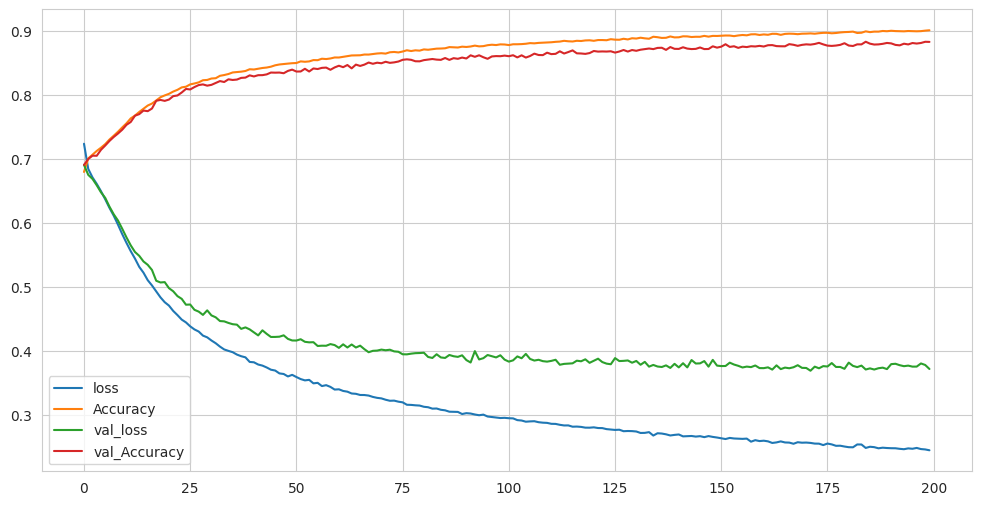

In [121]:
loss_df4.plot();

In [122]:
model4.evaluate(X_test, y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.3589 - Accuracy: 0.8844


[0.3589082658290863, 0.8844037652015686]

In [123]:
model4.save("model4.h5")

In [145]:
load4 =load_model('model4.h5')

In [146]:
weights4 = load4.get_weights()

In [147]:
weights4

[array([[ 0.04559593, -0.7032765 ,  0.39113498, ..., -0.09957215,
         -1.0063243 , -0.2196886 ],
        [-0.06512859,  0.2693265 , -0.26782265, ...,  0.2880397 ,
         -0.17927459, -0.05719656],
        [ 0.44504708, -0.8848899 , -0.09184349, ...,  0.58078635,
         -0.81136787,  0.36634234],
        ...,
        [ 0.04922819, -0.02782432, -0.19253775, ...,  0.07279477,
          0.0771017 , -0.00299477],
        [-0.3241651 , -0.0432676 ,  0.03834635, ...,  0.01217472,
         -0.04128841,  0.03703296],
        [-0.08292197, -0.21245109,  0.03838028, ...,  0.01053771,
         -0.00612529,  0.01548803]], dtype=float32),
 array([-1.42397523e-01, -3.41315754e-02, -6.84085414e-02, -6.63994253e-02,
        -1.55865684e-01, -3.33865918e-02,  1.43023670e-01, -1.63650632e-01,
        -2.05866948e-01,  1.49178086e-02, -1.51795428e-02, -1.52728081e-01,
        -1.06906757e-01, -1.17810018e-01, -2.26591178e-03, -5.16176522e-02,
        -4.81608957e-01, -1.58045720e-02, -1.54096663e

In [154]:
tf.random.set_seed(seed)

model5 = Sequential()

model5.add(Dense(512, input_dim=X_train.shape[1], activation="relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.1))
model5.add(Dense(512, activation="relu"))
model5.add(Dropout(0.1))
#model4.add(Dense(64, activation="relu"))
model5.add(Dropout(0.1))
model5.add(Dense(3, activation="softmax"))

model5.set_weights(weights4)

opt = Adam(learning_rate=0.0003)
model5.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["Accuracy"])

In [155]:
early_stop = EarlyStopping(monitor="val_Accuracy",
                           mode="max",
                           verbose=1,
                           patience=50)

In [156]:
history = model5.fit(x=X_train,
              y=y_resampled,
              validation_split=.1,
              batch_size=64,
              epochs=200,
              verbose=1,
              callbacks=[early_stop])

Epoch 1/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2444 - Accuracy: 0.9005 - val_loss: 0.3787 - val_Accuracy: 0.8811
Epoch 2/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2432 - Accuracy: 0.9009 - val_loss: 0.3802 - val_Accuracy: 0.8811
Epoch 3/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2442 - Accuracy: 0.9011 - val_loss: 0.3809 - val_Accuracy: 0.8790
Epoch 4/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2419 - Accuracy: 0.9019 - val_loss: 0.3855 - val_Accuracy: 0.8794
Epoch 5/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2437 - Accuracy: 0.9015 - val_loss: 0.3773 - val_Accuracy: 0.8828
Epoch 6/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2433 - Accuracy: 0.9015 - val_loss: 0.3741 - val_Accuracy: 0.8811
Epoch 7/200
2250/2250 [==============================] - 5s 2ms/step - loss: 0.2421 - Accuracy: 0.9022 - val_loss: 0.3786 - val_Ac

In [157]:
model5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               15872     
                                                                 
 batch_normalization_27 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_71 (Dropout)        (None, 512)               0         
                                                                 
 dense_88 (Dense)            (None, 512)               262656    
                                                                 
 dropout_72 (Dropout)        (None, 512)               0         
                                                                 
 dropout_73 (Dropout)        (None, 512)               0         
                                                     

In [158]:
loss_df5 = pd.DataFrame(model5.history.history)
loss_df5.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.244,0.901,0.379,0.881
1,0.243,0.901,0.380,0.881
2,0.244,0.901,0.381,0.879
3,0.242,0.902,0.386,0.879
4,0.244,0.901,0.377,0.883


In [159]:
loss_df5.describe().T

,count,mean,std,min,25%,50%,75%,max
loss,200.000,0.223,0.010,0.208,0.214,0.221,0.231,0.244
Accuracy,200.000,0.910,0.004,0.901,0.907,0.911,0.914,0.917
val_loss,200.000,0.376,0.004,0.365,0.373,0.376,0.379,0.389
val_Accuracy,200.000,0.889,0.005,0.879,0.886,0.890,0.893,0.897


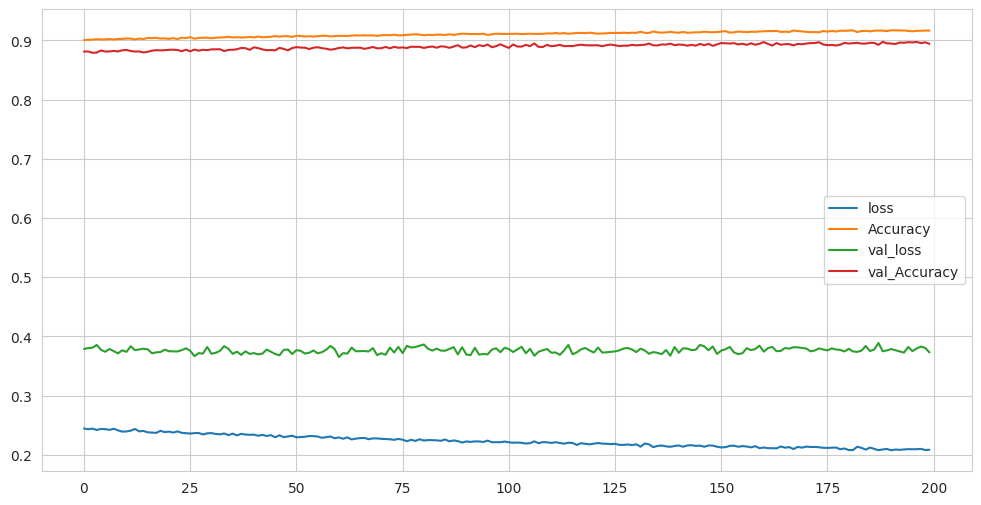

In [160]:
loss_df5.plot();

In [161]:
model5.evaluate(X_test, y_test)

1250/1250 [==============================] - 2s 1ms/step - loss: 0.3549 - Accuracy: 0.8980


[0.3548520803451538, 0.898009181022644]

In [162]:
model5.save("model5.h5")